<a href="https://colab.research.google.com/github/juanessj05/Estad-stica/blob/main/taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Hipótesis:
   H0: σ² = 0.5 mm²
   H1: σ² < 0.5 mm² (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: χ²
   Distribución bajo H0: Distribución Chi-cuadrado con 11 grados de libertad
   Justificación: Prueba de hipótesis sobre una sola varianza poblacional.

4. Valor crítico y región de rechazo:
   Valor crítico χ²: 4.5748
   Región de rechazo: χ²_calculado < 4.5748

5. Cálculo del estadístico de prueba y valor p:
   Estadístico de prueba χ² calculado: 6.6000
   Valor p: 0.1695

6. Gráfico:


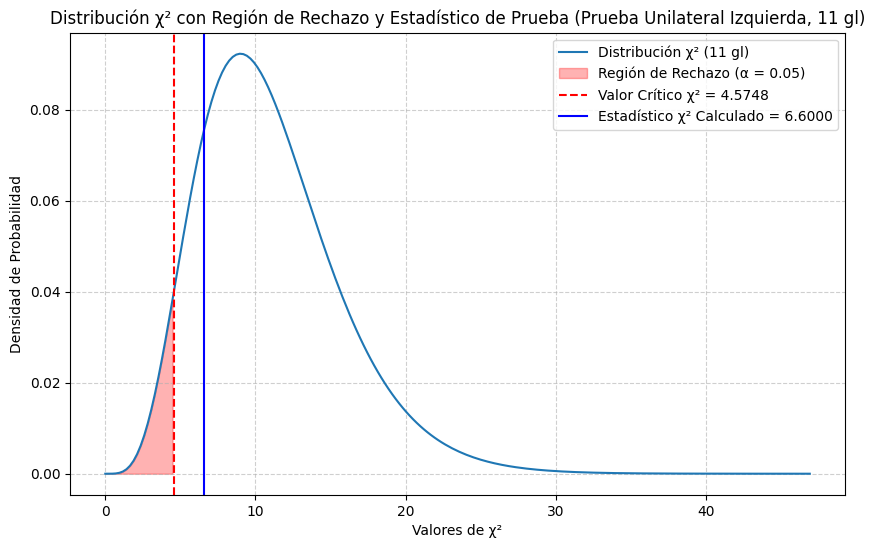


7. Decisión y Conclusión:
   Decisión estadística: No rechazar H0 (porque el estadístico χ² calculado (6.6000) >= valor crítico χ² (4.5748))
   O: No rechazar H0 (porque el valor p (0.1695) >= nivel de significancia α (0.05))
   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que la varianza poblacional del grosor de las piezas metálicas es menor a 0.5 mm². No podemos rechazar la afirmación del control de calidad de que la varianza es de al menos 0.5 mm².
   Significado del valor p: Si la varianza poblacional real fuera de 0.5 mm² (H0 es verdadera), habría una probabilidad de 16.95% de obtener una varianza muestral tan baja o más baja como 0.3 mm² por pura casualidad.


In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
varianza_poblacional_hipotetizada = 0.5  # mm^2 (afirmación del control de calidad bajo H0)
varianza_muestral = 0.3  # mm^2 (s^2)
tamano_muestra = 12
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: La varianza poblacional del grosor es igual a 0.5 (σ² = 0.5).
# H1: La varianza poblacional del grosor es menor a 0.5 (σ² < 0.5).
# Esta es una prueba unilateral izquierda porque se investiga si la varianza es "menor".
print("1. Hipótesis:")
print(f"   H0: σ² = {varianza_poblacional_hipotetizada} mm²")
print(f"   H1: σ² < {varianza_poblacional_hipotetizada} mm² (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico chi-cuadrado (χ²) para pruebas de hipótesis sobre una sola varianza poblacional.
# La distribución del estadístico de prueba bajo H0 es la distribución chi-cuadrado con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: χ²")
print(f"   Distribución bajo H0: Distribución Chi-cuadrado con {grados_libertad} grados de libertad")
print("   Justificación: Prueba de hipótesis sobre una sola varianza poblacional.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.05 y n-1 grados de libertad, el valor crítico chi-cuadrado es el valor
# tal que el 5% del área está en la cola izquierda de la distribución chi-cuadrado.
valor_critico_chi2 = stats.chi2.ppf(nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico χ²: {valor_critico_chi2:.4f}")
print(f"   Región de rechazo: χ²_calculado < {valor_critico_chi2:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico chi-cuadrado para una varianza: χ² = ((n - 1) * s²) / σ²
estadistico_chi2 = ((tamano_muestra - 1) * varianza_muestral) / varianza_poblacional_hipotetizada
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Estadístico de prueba χ² calculado: {estadistico_chi2:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico chi-cuadrado calculado.
valor_p = stats.chi2.cdf(estadistico_chi2, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución chi-cuadrado
# Asegurarse de que los valores de x sean no negativos para la distribución chi-cuadrado
x_values = np.linspace(0, stats.chi2.ppf(0.999, grados_libertad) * 1.5, 200) # Ajustar el rango del eje x
pdf_values = stats.chi2.pdf(x_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, label=f'Distribución χ² ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para χ² < valor_critico_chi2
x_rechazo = x_values[x_values < valor_critico_chi2]
pdf_rechazo = stats.chi2.pdf(x_rechazo, grados_libertad)
plt.fill_between(x_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_chi2, color='red', linestyle='--', label=f'Valor Crítico χ² = {valor_critico_chi2:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_chi2, color='blue', linestyle='-', label=f'Estadístico χ² Calculado = {estadistico_chi2:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución χ² con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda, {grados_libertad} gl)')
plt.xlabel('Valores de χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_chi2 < valor_critico_chi2:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico χ² calculado ({estadistico_chi2:.4f}) < valor crítico χ² ({valor_critico_chi2:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que la varianza poblacional del grosor de las piezas metálicas es menor a 0.5 mm². Esto sugiere que el proceso es menos variable de lo garantizado.")
    print(f"   Significado del valor p: Si la varianza poblacional real fuera de 0.5 mm² (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una varianza muestral tan baja o más baja como 0.3 mm² por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico χ² calculado ({estadistico_chi2:.4f}) >= valor crítico χ² ({valor_critico_chi2:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que la varianza poblacional del grosor de las piezas metálicas es menor a 0.5 mm². No podemos rechazar la afirmación del control de calidad de que la varianza es de al menos 0.5 mm².")
    print(f"   Significado del valor p: Si la varianza poblacional real fuera de 0.5 mm² (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una varianza muestral tan baja o más baja como 0.3 mm² por pura casualidad.")

1. Hipótesis:
   H0: σ² = 1.2 ml²
   H1: σ² > 1.2 ml² (Prueba unilateral derecha)

2. Nivel de significancia α:
   α = 0.01

3. Estadístico de prueba y distribución:
   Estadístico de prueba: χ²
   Distribución bajo H0: Distribución Chi-cuadrado con 19 grados de libertad
   Justificación: Prueba de hipótesis sobre una sola varianza poblacional.

4. Valor crítico y región de rechazo:
   Valor crítico χ²: 36.1909
   Región de rechazo: χ²_calculado > 36.1909

5. Cálculo del estadístico de prueba y valor p:
   Estadístico de prueba χ² calculado: 31.6667
   Valor p: 0.0341

6. Gráfico:


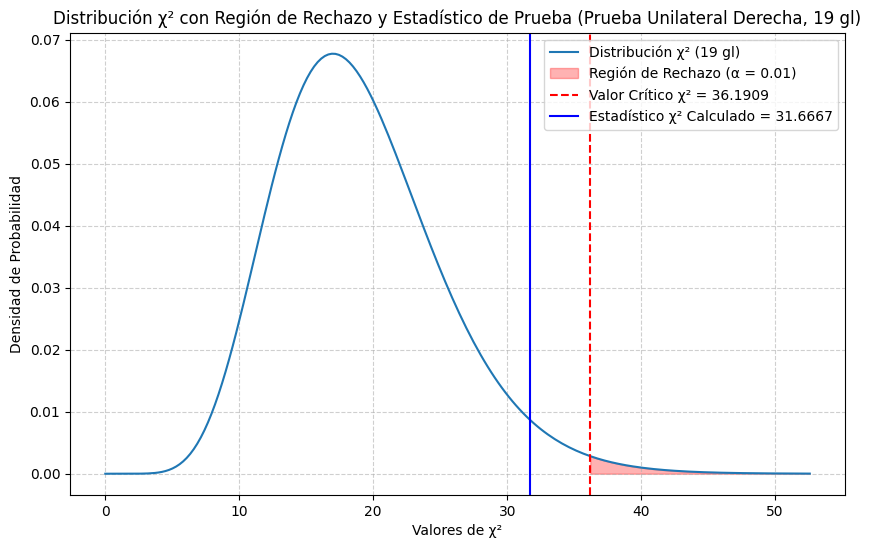


7. Decisión y Conclusión:
   Decisión estadística: No rechazar H0 (porque el estadístico χ² calculado (31.6667) <= valor crítico χ² (36.1909))
   O: No rechazar H0 (porque el valor p (0.0341) >= nivel de significancia α (0.01))
   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que la varianza poblacional del llenado de las botellas es mayor a 1.2 ml². No podemos rechazar la afirmación de la máquina de que la varianza es de 1.2 ml².
   Significado del valor p: Si la varianza poblacional real fuera de 1.2 ml² (H0 es verdadera), habría una probabilidad de 3.41% de obtener una varianza muestral tan alta o más alta como 2.0 ml² por pura casualidad.


In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
varianza_poblacional_hipotetizada = 1.2  # ml^2 (afirmación de la máquina bajo H0)
varianza_muestral = 2.0  # ml^2 (s^2)
tamano_muestra = 20
nivel_significancia = 0.01  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: La varianza poblacional del llenado es igual a 1.2 (σ² = 1.2).
# H1: La varianza poblacional del llenado es mayor a 1.2 (σ² > 1.2).
# Esta es una prueba unilateral derecha porque se investiga si la varianza es "mayor".
print("1. Hipótesis:")
print(f"   H0: σ² = {varianza_poblacional_hipotetizada} ml²")
print(f"   H1: σ² > {varianza_poblacional_hipotetizada} ml² (Prueba unilateral derecha)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico chi-cuadrado (χ²) para pruebas de hipótesis sobre una sola varianza poblacional.
# La distribución del estadístico de prueba bajo H0 es la distribución chi-cuadrado con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: χ²")
print(f"   Distribución bajo H0: Distribución Chi-cuadrado con {grados_libertad} grados de libertad")
print("   Justificación: Prueba de hipótesis sobre una sola varianza poblacional.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral derecha con α = 0.01 y n-1 grados de libertad, el valor crítico chi-cuadrado es el valor
# tal que el 1% del área está en la cola derecha de la distribución chi-cuadrado.
valor_critico_chi2 = stats.chi2.ppf(1 - nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico χ²: {valor_critico_chi2:.4f}")
print(f"   Región de rechazo: χ²_calculado > {valor_critico_chi2:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico chi-cuadrado para una varianza: χ² = ((n - 1) * s²) / σ²
estadistico_chi2 = ((tamano_muestra - 1) * varianza_muestral) / varianza_poblacional_hipotetizada
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Estadístico de prueba χ² calculado: {estadistico_chi2:.4f}")

# Para una prueba unilateral derecha, el valor p es el área a la derecha del estadístico chi-cuadrado calculado.
valor_p = 1 - stats.chi2.cdf(estadistico_chi2, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")


# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución chi-cuadrado
# Asegurarse de que los valores de x sean no negativos para la distribución chi-cuadrado
x_values = np.linspace(0, stats.chi2.ppf(0.999, grados_libertad) * 1.2, 200) # Ajustar el rango del eje x
pdf_values = stats.chi2.pdf(x_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, label=f'Distribución χ² ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola derecha)
# La región de rechazo es para χ² > valor_critico_chi2
x_rechazo = x_values[x_values > valor_critico_chi2]
pdf_rechazo = stats.chi2.pdf(x_rechazo, grados_libertad)
plt.fill_between(x_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_chi2, color='red', linestyle='--', label=f'Valor Crítico χ² = {valor_critico_chi2:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_chi2, color='blue', linestyle='-', label=f'Estadístico χ² Calculado = {estadistico_chi2:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución χ² con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Derecha, {grados_libertad} gl)')
plt.xlabel('Valores de χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_chi2 > valor_critico_chi2:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico χ² calculado ({estadistico_chi2:.4f}) > valor crítico χ² ({valor_critico_chi2:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 1%) para concluir que la varianza poblacional del llenado de las botellas es mayor a 1.2 ml². Esto sugiere que el proceso de llenado es más variable de lo permitido.")
    print(f"   Significado del valor p: Si la varianza poblacional real fuera de 1.2 ml² (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una varianza muestral tan alta o más alta como 2.0 ml² por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico χ² calculado ({estadistico_chi2:.4f}) <= valor crítico χ² ({valor_critico_chi2:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que la varianza poblacional del llenado de las botellas es mayor a 1.2 ml². No podemos rechazar la afirmación de la máquina de que la varianza es de 1.2 ml².")
    print(f"   Significado del valor p: Si la varianza poblacional real fuera de 1.2 ml² (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una varianza muestral tan alta o más alta como 2.0 ml² por pura casualidad.")

1. Hipótesis:
   H0: σ² = 2.5 minutos²
   H1: σ² ≠ 2.5 minutos² (Prueba bilateral)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: χ²
   Distribución bajo H0: Distribución Chi-cuadrado con 15 grados de libertad
   Justificación: Prueba de hipótesis sobre una sola varianza poblacional.

4. Valores críticos y región de rechazo:
   Valores críticos χ²: 6.2621 y 27.4884
   Región de rechazo: χ²_calculado < 6.2621 o χ²_calculado > 27.4884

5. Cálculo del estadístico de prueba y valor p:
   Estadístico de prueba χ² calculado: 24.0000
   Valor p: 0.1302

6. Gráfico:


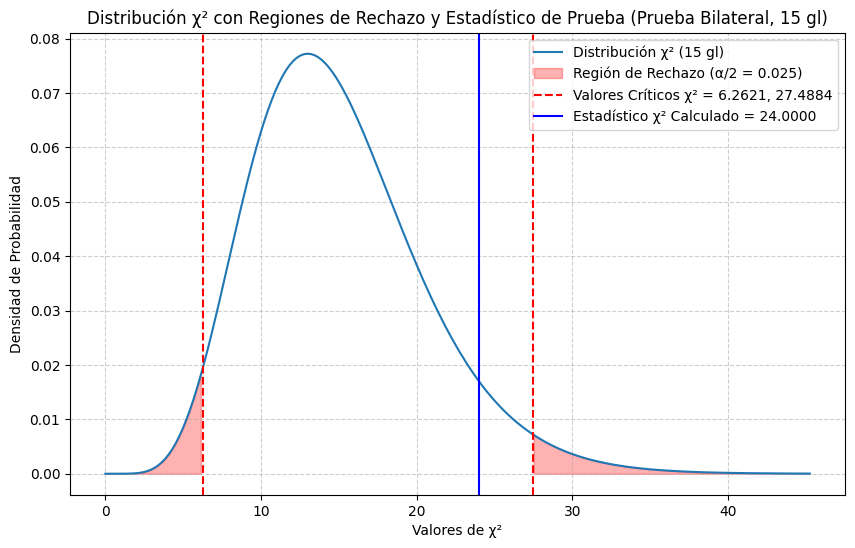


7. Decisión y Conclusión:
   Decisión estadística: No rechazar H0 (porque el estadístico χ² calculado (24.0000) no cae en la región de rechazo)
   O: No rechazar H0 (porque el valor p (0.1302) >= nivel de significancia α (0.05))
   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que la varianza poblacional del tiempo de duración de las llamadas difiere de 2.5 minutos². No podemos rechazar la afirmación de la compañía.
   Significado del valor p: Si la varianza poblacional real fuera de 2.5 minutos² (H0 es verdadera), habría una probabilidad de 13.02% de obtener una varianza muestral tan extrema o más extrema (tan baja como una varianza que diera el valor crítico inferior o tan alta como una varianza que diera el valor crítico superior, o en este caso, una varianza de 4.00) por pura casualidad.


In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
varianza_poblacional_hipotetizada = 2.5  # minutos^2 (afirmación de la compañía bajo H0)
varianza_muestral = 4  # minutos^2 (s^2)
tamano_muestra = 16
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: La varianza poblacional del tiempo de duración de las llamadas es igual a 2.5 (σ² = 2.5).
# H1: La varianza poblacional del tiempo de duración de las llamadas es diferente a 2.5 (σ² ≠ 2.5).
# Esta es una prueba bilateral porque se investiga si la varianza "difiere".
print("1. Hipótesis:")
print(f"   H0: σ² = {varianza_poblacional_hipotetizada} minutos²")
print(f"   H1: σ² ≠ {varianza_poblacional_hipotetizada} minutos² (Prueba bilateral)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico chi-cuadrado (χ²) para pruebas de hipótesis sobre una sola varianza poblacional.
# La distribución del estadístico de prueba bajo H0 es la distribución chi-cuadrado con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: χ²")
print(f"   Distribución bajo H0: Distribución Chi-cuadrado con {grados_libertad} grados de libertad")
print("   Justificación: Prueba de hipótesis sobre una sola varianza poblacional.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba bilateral con α = 0.05, el área en cada cola es α/2 = 0.025.
# Hay dos valores críticos chi-cuadrado.
valor_critico_chi2_inferior = stats.chi2.ppf(nivel_significancia / 2, grados_libertad)
valor_critico_chi2_superior = stats.chi2.ppf(1 - nivel_significancia / 2, grados_libertad)
print("\n4. Valores críticos y región de rechazo:")
print(f"   Valores críticos χ²: {valor_critico_chi2_inferior:.4f} y {valor_critico_chi2_superior:.4f}")
print(f"   Región de rechazo: χ²_calculado < {valor_critico_chi2_inferior:.4f} o χ²_calculado > {valor_critico_chi2_superior:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico chi-cuadrado para una varianza: χ² = ((n - 1) * s²) / σ²
estadistico_chi2 = ((tamano_muestra - 1) * varianza_muestral) / varianza_poblacional_hipotetizada
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Estadístico de prueba χ² calculado: {estadistico_chi2:.4f}")

# Para una prueba bilateral, el valor p es el doble del área en la cola más allá del estadístico chi-cuadrado calculado.
# Si el estadístico calculado es menor que el valor crítico inferior, el valor p es 2 * cdf(estadistico).
# Si el estadístico calculado es mayor que el valor crítico superior, el valor p es 2 * (1 - cdf(estadistico)).
# Si está entre los valores críticos, el valor p es 2 * min(cdf(estadistico), 1 - cdf(estadistico)).

# Calculamos el valor p
if estadistico_chi2 < grados_libertad: # Esto es una heurística simple para saber si estamos en la cola izquierda o derecha para calcular el valor p correctamente en una prueba bilateral
     valor_p = 2 * stats.chi2.cdf(estadistico_chi2, grados_libertad)
else:
     valor_p = 2 * (1 - stats.chi2.cdf(estadistico_chi2, grados_libertad))

# Una forma más robusta para el valor p bilateral es:
# valor_p = 2 * min(stats.chi2.cdf(estadistico_chi2, grados_libertad), 1 - stats.chi2.cdf(estadistico_chi2, grados_libertad))


print(f"   Valor p: {valor_p:.4f}")


# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución chi-cuadrado
# Asegurarse de que los valores de x sean no negativos para la distribución chi-cuadrado
x_values = np.linspace(0, stats.chi2.ppf(0.999, grados_libertad) * 1.2, 200) # Ajustar el rango del eje x
pdf_values = stats.chi2.pdf(x_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, label=f'Distribución χ² ({grados_libertad} gl)')

# Rellenar la región de rechazo (colas)
# Región de rechazo inferior: χ² < valor_critico_chi2_inferior
x_rechazo_inferior = x_values[x_values < valor_critico_chi2_inferior]
pdf_rechazo_inferior = stats.chi2.pdf(x_rechazo_inferior, grados_libertad)
plt.fill_between(x_rechazo_inferior, pdf_rechazo_inferior, color='red', alpha=0.3, label=f'Región de Rechazo (α/2 = {nivel_significancia/2})')

# Región de rechazo superior: χ² > valor_critico_chi2_superior
x_rechazo_superior = x_values[x_values > valor_critico_chi2_superior]
pdf_rechazo_superior = stats.chi2.pdf(x_rechazo_superior, grados_libertad)
plt.fill_between(x_rechazo_superior, pdf_rechazo_superior, color='red', alpha=0.3) # No label here

# Marcar los valores críticos
plt.axvline(valor_critico_chi2_inferior, color='red', linestyle='--', label=f'Valores Críticos χ² = {valor_critico_chi2_inferior:.4f}, {valor_critico_chi2_superior:.4f}')
plt.axvline(valor_critico_chi2_superior, color='red', linestyle='--') # No label here

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_chi2, color='blue', linestyle='-', label=f'Estadístico χ² Calculado = {estadistico_chi2:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución χ² con Regiones de Rechazo y Estadístico de Prueba (Prueba Bilateral, {grados_libertad} gl)')
plt.xlabel('Valores de χ²')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_chi2 < valor_critico_chi2_inferior or estadistico_chi2 > valor_critico_chi2_superior:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico χ² calculado ({estadistico_chi2:.4f}) cae en la región de rechazo)")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print(f"   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del {nivel_significancia*100:.0f}%) para concluir que la varianza poblacional del tiempo de duración de las llamadas difiere de {varianza_poblacional_hipotetizada} minutos². Esto contradice la afirmación de la compañía.")
    print(f"   Significado del valor p: Si la varianza poblacional real fuera de {varianza_poblacional_hipotetizada} minutos² (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una varianza muestral tan extrema o más extrema (tan baja como una varianza que diera el valor crítico inferior o tan alta como una varianza que diera el valor crítico superior, o en este caso, una varianza de {varianza_muestral:.2f}) por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico χ² calculado ({estadistico_chi2:.4f}) no cae en la región de rechazo)")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print(f"   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del {nivel_significancia*100:.0f}%) para concluir que la varianza poblacional del tiempo de duración de las llamadas difiere de {varianza_poblacional_hipotetizada} minutos². No podemos rechazar la afirmación de la compañía.")
    print(f"   Significado del valor p: Si la varianza poblacional real fuera de {varianza_poblacional_hipotetizada} minutos² (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una varianza muestral tan extrema o más extrema (tan baja como una varianza que diera el valor crítico inferior o tan alta como una varianza que diera el valor crítico superior, o en este caso, una varianza de {varianza_muestral:.2f}) por pura casualidad.")

1. Hipótesis:
   H0: μ = 10000 horas
   H1: μ < 10000 horas (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: t
   Distribución bajo H0: Distribución t de Student con 19 grados de libertad
   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.

4. Valor crítico y región de rechazo:
   Valor crítico t: -1.7291
   Región de rechazo: t_calculado < -1.7291

5. Cálculo del estadístico de prueba y valor p:
   Error estándar muestral: 67.0820
   Estadístico de prueba t calculado: -2.9814
   Valor p: 0.0038

6. Gráfico:


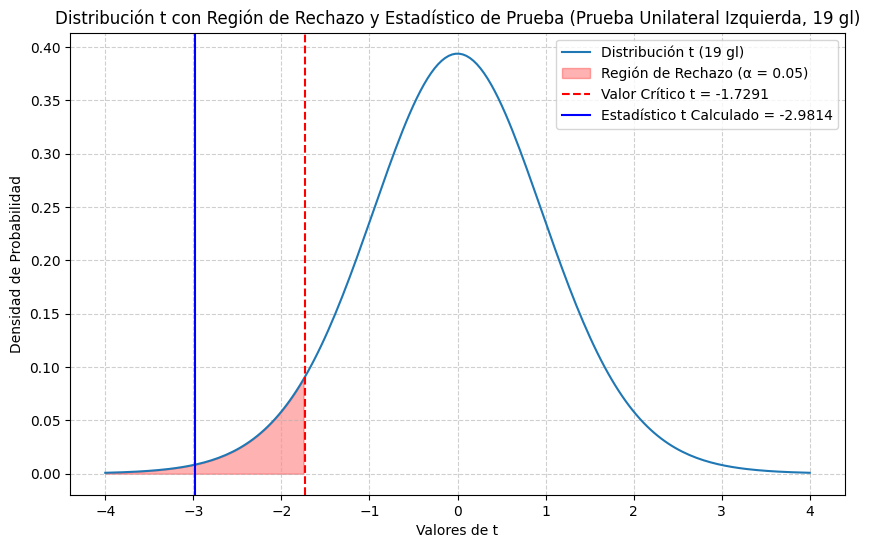


7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico t calculado (-2.9814) < valor crítico t (-1.7291))
   O: Rechazar H0 (porque el valor p (0.0038) < nivel de significancia α (0.05))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que la duración promedio de los focos es menor a 10000 horas. Esto contradice la afirmación del fabricante.
   Significado del valor p: Si la duración promedio real fuera de 10000 horas (H0 es verdadera), habría una probabilidad de 0.38% de obtener una media muestral tan baja o más baja como 9800 horas por pura casualidad.


In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 10000  # horas (afirmación del fabricante bajo H0)
media_muestral = 9800  # horas
desviacion_estandar_muestral = 300  # horas (s)
tamano_muestra = 20
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: La duración promedio de los focos es igual a 10000 horas (μ = 10000).
# H1: La duración promedio de los focos es menor a 10000 horas (μ < 10000).
# Esta es una prueba unilateral izquierda porque la media muestral es menor que la hipotetizada.
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} horas")
print(f"   H1: μ < {media_poblacional_hipotetizada} horas (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico t porque la desviación estándar poblacional (σ) es desconocida
# y el tamaño de la muestra es pequeño (n < 30).
# La distribución del estadístico de prueba bajo H0 es la distribución t de Student con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: t")
print(f"   Distribución bajo H0: Distribución t de Student con {grados_libertad} grados de libertad")
print("   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.05 y n-1 grados de libertad, el valor crítico t es el valor
# tal que el 5% del área está en la cola izquierda de la distribución t.
valor_critico_t = stats.t.ppf(nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico t: {valor_critico_t:.4f}")
print(f"   Región de rechazo: t_calculado < {valor_critico_t:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico t para una media con σ desconocida: t = (x̄ - μ) / (s / √n)
error_estandar_muestral = desviacion_estandar_muestral / np.sqrt(tamano_muestra)
estadistico_t = (media_muestral - media_poblacional_hipotetizada) / error_estandar_muestral
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar muestral: {error_estandar_muestral:.4f}")
print(f"   Estadístico de prueba t calculado: {estadistico_t:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico t calculado.
valor_p = stats.t.cdf(estadistico_t, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución t
t_values = np.linspace(-4, 4, 200)
pdf_values = stats.t.pdf(t_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf_values, label=f'Distribución t ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para t < valor_critico_t
t_rechazo = t_values[t_values < valor_critico_t]
pdf_rechazo = stats.t.pdf(t_rechazo, grados_libertad)
plt.fill_between(t_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_t, color='red', linestyle='--', label=f'Valor Crítico t = {valor_critico_t:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_t, color='blue', linestyle='-', label=f'Estadístico t Calculado = {estadistico_t:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución t con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda, {grados_libertad} gl)')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_t < valor_critico_t:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) < valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que la duración promedio de los focos es menor a 10000 horas. Esto contradice la afirmación del fabricante.")
    print(f"   Significado del valor p: Si la duración promedio real fuera de 10000 horas (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 9800 horas por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) >= valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que la duración promedio de los focos es menor a 10000 horas. No podemos rechazar la afirmación del fabricante de que la duración promedio es de 10000 horas.")
    print(f"   Significado del valor p: Si la duración promedio real fuera de 10000 horas (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 9800 horas por pura casualidad.")

1. Hipótesis:
   H0: μ = 2 mg/dL
   H1: μ < 2 mg/dL (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.1

3. Estadístico de prueba y distribución:
   Estadístico de prueba: t
   Distribución bajo H0: Distribución t de Student con 7 grados de libertad
   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.

4. Valor crítico y región de rechazo:
   Valor crítico t: -1.4149
   Región de rechazo: t_calculado < -1.4149

5. Cálculo del estadístico de prueba y valor p:
   Error estándar muestral: 0.2121
   Estadístico de prueba t calculado: -2.3570
   Valor p: 0.0253

6. Gráfico:


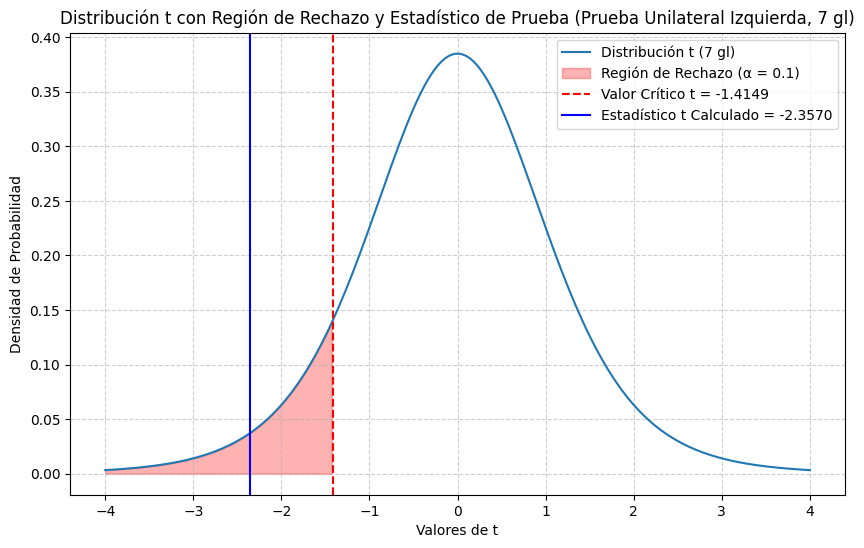


7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico t calculado (-2.3570) < valor crítico t (-1.4149))
   O: Rechazar H0 (porque el valor p (0.0253) < nivel de significancia α (0.1))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 10%) para concluir que el aumento promedio real del nivel de hierro es menor a 2 mg/dL. Esto contradice la afirmación del suplemento.
   Significado del valor p: Si el aumento promedio real fuera de 2 mg/dL (H0 es verdadera), habría una probabilidad de 2.53% de obtener un aumento promedio muestral tan bajo o más bajo como 1.5 mg/dL por pura casualidad.


In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
aumento_promedio_hipotetizado = 2  # mg/dL (afirmación del suplemento bajo H0)
aumento_promedio_muestral = 1.5  # mg/dL
desviacion_estandar_muestral = 0.6  # mg/dL (s)
tamano_muestra = 8
nivel_significancia = 0.10  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El aumento promedio del nivel de hierro es igual a 2 mg/dL (μ = 2).
# H1: El aumento promedio del nivel de hierro es menor a 2 mg/dL (μ < 2).
# Esta es una prueba unilateral izquierda porque el aumento muestral es menor que el hipotetizado.
print("1. Hipótesis:")
print(f"   H0: μ = {aumento_promedio_hipotetizado} mg/dL")
print(f"   H1: μ < {aumento_promedio_hipotetizado} mg/dL (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico t porque la desviación estándar poblacional (σ) es desconocida
# y el tamaño de la muestra es pequeño (n < 30).
# La distribución del estadístico de prueba bajo H0 es la distribución t de Student con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: t")
print(f"   Distribución bajo H0: Distribución t de Student con {grados_libertad} grados de libertad")
print("   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.10 y n-1 grados de libertad, el valor crítico t es el valor
# tal que el 10% del área está en la cola izquierda de la distribución t.
valor_critico_t = stats.t.ppf(nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico t: {valor_critico_t:.4f}")
print(f"   Región de rechazo: t_calculado < {valor_critico_t:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico t para una media con σ desconocida: t = (x̄ - μ) / (s / √n)
error_estandar_muestral = desviacion_estandar_muestral / np.sqrt(tamano_muestra)
estadistico_t = (aumento_promedio_muestral - aumento_promedio_hipotetizado) / error_estandar_muestral
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar muestral: {error_estandar_muestral:.4f}")
print(f"   Estadístico de prueba t calculado: {estadistico_t:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico t calculado.
valor_p = stats.t.cdf(estadistico_t, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución t
t_values = np.linspace(-4, 4, 200)
pdf_values = stats.t.pdf(t_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf_values, label=f'Distribución t ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para t < valor_critico_t
t_rechazo = t_values[t_values < valor_critico_t]
pdf_rechazo = stats.t.pdf(t_rechazo, grados_libertad)
plt.fill_between(t_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_t, color='red', linestyle='--', label=f'Valor Crítico t = {valor_critico_t:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_t, color='blue', linestyle='-', label=f'Estadístico t Calculado = {estadistico_t:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución t con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda, {grados_libertad} gl)')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_t < valor_critico_t:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) < valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print(f"   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del {nivel_significancia*100:.0f}%) para concluir que el aumento promedio real del nivel de hierro es menor a {aumento_promedio_hipotetizado} mg/dL. Esto contradice la afirmación del suplemento.")
    print(f"   Significado del valor p: Si el aumento promedio real fuera de {aumento_promedio_hipotetizado} mg/dL (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener un aumento promedio muestral tan bajo o más bajo como {aumento_promedio_muestral} mg/dL por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) >= valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print(f"   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del {nivel_significancia*100:.0f}%) para concluir que el aumento promedio real del nivel de hierro es menor a {aumento_promedio_hipotetizado} mg/dL. No podemos rechazar la afirmación del suplemento de que el aumento promedio es de {aumento_promedio_hipotetizado} mg/dL.")
    print(f"   Significado del valor p: Si el aumento promedio real fuera de {aumento_promedio_hipotetizado} mg/dL (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener un aumento promedio muestral tan bajo o más bajo como {aumento_promedio_muestral} mg/dL por pura casualidad.")

1. Hipótesis:
   H0: μ = 15 km/L
   H1: μ < 15 km/L (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: t
   Distribución bajo H0: Distribución t de Student con 9 grados de libertad
   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.

4. Valor crítico y región de rechazo:
   Valor crítico t: -1.8331
   Región de rechazo: t_calculado < -1.8331

5. Cálculo del estadístico de prueba y valor p:
   Error estándar muestral: 0.3795
   Estadístico de prueba t calculado: -2.6352
   Valor p: 0.0136

6. Gráfico:


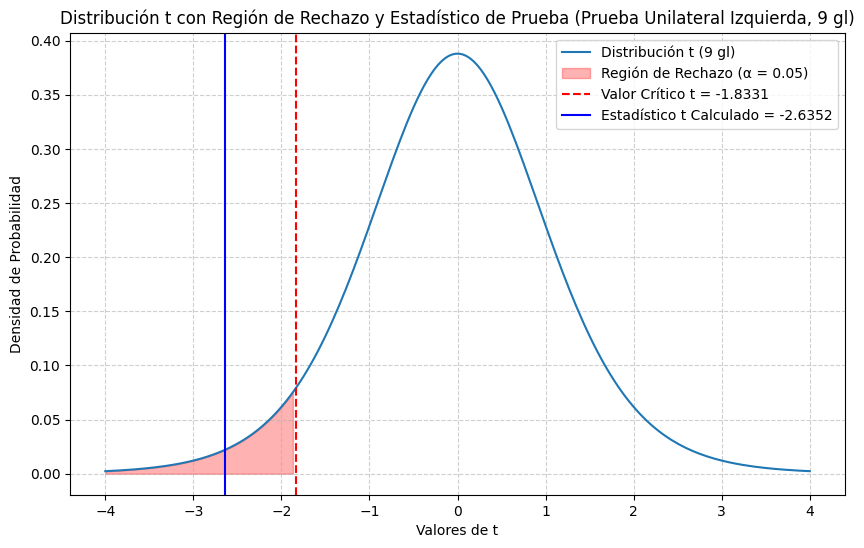


7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico t calculado (-2.6352) < valor crítico t (-1.8331))
   O: Rechazar H0 (porque el valor p (0.0136) < nivel de significancia α (0.05))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que el consumo promedio real del auto es menor a 15 km/L. Esto contradice la afirmación del fabricante.
   Significado del valor p: Si el consumo promedio real fuera de 15 km/L (H0 es verdadera), habría una probabilidad de 1.36% de obtener una media muestral tan baja o más baja como 14 km/L por pura casualidad.


In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 15  # km/L (afirmación del fabricante bajo H0)
media_muestral = 14  # km/L
desviacion_estandar_muestral = 1.2  # km/L (s)
tamano_muestra = 10
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El consumo promedio del auto es igual a 15 km/L (μ = 15).
# H1: El consumo promedio del auto es menor a 15 km/L (μ < 15).
# Esta es una prueba unilateral izquierda porque la media muestral es menor que la hipotetizada,
# sugiriendo que el consumo real es menor (más km/L significa menos consumo).
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} km/L")
print(f"   H1: μ < {media_poblacional_hipotetizada} km/L (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico t porque la desviación estándar poblacional (σ) es desconocida
# y el tamaño de la muestra es pequeño (n < 30).
# La distribución del estadístico de prueba bajo H0 es la distribución t de Student con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: t")
print(f"   Distribución bajo H0: Distribución t de Student con {grados_libertad} grados de libertad")
print("   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.05 y n-1 grados de libertad, el valor crítico t es el valor
# tal que el 5% del área está en la cola izquierda de la distribución t.
valor_critico_t = stats.t.ppf(nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico t: {valor_critico_t:.4f}")
print(f"   Región de rechazo: t_calculado < {valor_critico_t:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico t para una media con σ desconocida: t = (x̄ - μ) / (s / √n)
error_estandar_muestral = desviacion_estandar_muestral / np.sqrt(tamano_muestra)
estadistico_t = (media_muestral - media_poblacional_hipotetizada) / error_estandar_muestral
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar muestral: {error_estandar_muestral:.4f}")
print(f"   Estadístico de prueba t calculado: {estadistico_t:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico t calculado.
valor_p = stats.t.cdf(estadistico_t, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución t
t_values = np.linspace(-4, 4, 200)
pdf_values = stats.t.pdf(t_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf_values, label=f'Distribución t ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para t < valor_critico_t
t_rechazo = t_values[t_values < valor_critico_t]
pdf_rechazo = stats.t.pdf(t_rechazo, grados_libertad)
plt.fill_between(t_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_t, color='red', linestyle='--', label=f'Valor Crítico t = {valor_critico_t:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_t, color='blue', linestyle='-', label=f'Estadístico t Calculado = {estadistico_t:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución t con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda, {grados_libertad} gl)')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_t < valor_critico_t:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) < valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que el consumo promedio real del auto es menor a 15 km/L. Esto contradice la afirmación del fabricante.")
    print(f"   Significado del valor p: Si el consumo promedio real fuera de 15 km/L (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 14 km/L por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) >= valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que el consumo promedio real del auto es menor a 15 km/L. No podemos rechazar la afirmación del fabricante de que el consumo promedio es de 15 km/L.")
    print(f"   Significado del valor p: Si el consumo promedio real fuera de 15 km/L (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 14 km/L por pura casualidad.")

1. Hipótesis:
   H0: μ = 80 puntos
   H1: μ < 80 puntos (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.01

3. Estadístico de prueba y distribución:
   Estadístico de prueba: t
   Distribución bajo H0: Distribución t de Student con 11 grados de libertad
   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.

4. Valor crítico y región de rechazo:
   Valor crítico t: -2.7181
   Región de rechazo: t_calculado < -2.7181

5. Cálculo del estadístico de prueba y valor p:
   Error estándar muestral: 2.3094
   Estadístico de prueba t calculado: -2.1651
   Valor p: 0.0266

6. Gráfico:


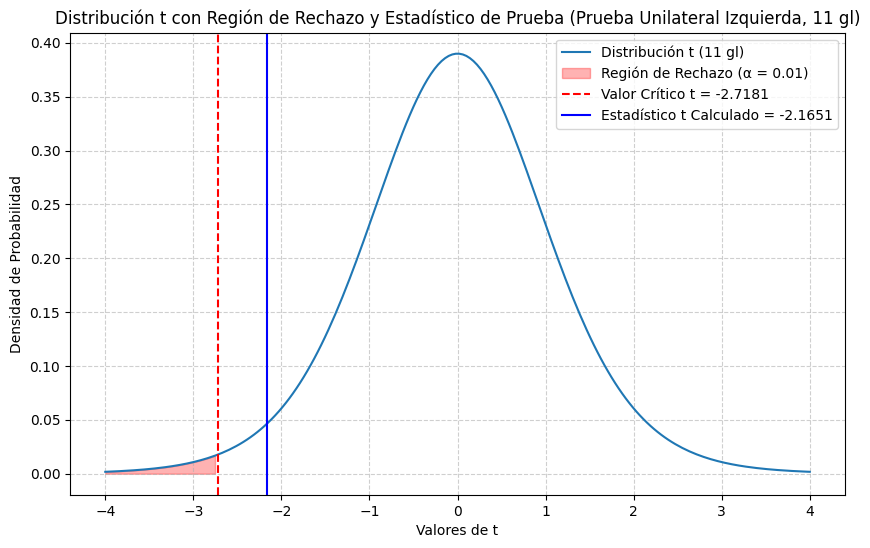


7. Decisión y Conclusión:
   Decisión estadística: No rechazar H0 (porque el estadístico t calculado (-2.1651) >= valor crítico t (-2.7181))
   O: No rechazar H0 (porque el valor p (0.0266) >= nivel de significancia α (0.01))
   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que el promedio de la clase en matemáticas es menor a 80 puntos. No podemos rechazar la afirmación del colegio de que el promedio es de 80 puntos.
   Significado del valor p: Si el promedio real de la clase fuera de 80 puntos (H0 es verdadera), habría una probabilidad de 2.66% de obtener una media muestral tan baja o más baja como 75 puntos por pura casualidad.


In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 80  # puntos (afirmación del colegio bajo H0)
media_muestral = 75  # puntos
desviacion_estandar_muestral = 8  # puntos (s)
tamano_muestra = 12
nivel_significancia = 0.01  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El promedio de la clase es igual a 80 puntos (μ = 80).
# H1: El promedio de la clase es menor a 80 puntos (μ < 80).
# Esta es una prueba unilateral izquierda porque la media muestral es menor que la hipotetizada,
# sugiriendo un promedio más bajo.
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} puntos")
print(f"   H1: μ < {media_poblacional_hipotetizada} puntos (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico t porque la desviación estándar poblacional (σ) es desconocida
# y el tamaño de la muestra es pequeño (n < 30).
# La distribución del estadístico de prueba bajo H0 es la distribución t de Student con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: t")
print(f"   Distribución bajo H0: Distribución t de Student con {grados_libertad} grados de libertad")
print("   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.01 y n-1 grados de libertad, el valor crítico t es el valor
# tal que el 1% del área está en la cola izquierda de la distribución t.
valor_critico_t = stats.t.ppf(nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico t: {valor_critico_t:.4f}")
print(f"   Región de rechazo: t_calculado < {valor_critico_t:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico t para una media con σ desconocida: t = (x̄ - μ) / (s / √n)
error_estandar_muestral = desviacion_estandar_muestral / np.sqrt(tamano_muestra)
estadistico_t = (media_muestral - media_poblacional_hipotetizada) / error_estandar_muestral
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar muestral: {error_estandar_muestral:.4f}")
print(f"   Estadístico de prueba t calculado: {estadistico_t:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico t calculado.
valor_p = stats.t.cdf(estadistico_t, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución t
t_values = np.linspace(-4, 4, 200)
pdf_values = stats.t.pdf(t_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf_values, label=f'Distribución t ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para t < valor_critico_t
t_rechazo = t_values[t_values < valor_critico_t]
pdf_rechazo = stats.t.pdf(t_rechazo, grados_libertad)
plt.fill_between(t_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_t, color='red', linestyle='--', label=f'Valor Crítico t = {valor_critico_t:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_t, color='blue', linestyle='-', label=f'Estadístico t Calculado = {estadistico_t:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución t con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda, {grados_libertad} gl)')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_t < valor_critico_t:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) < valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 1%) para concluir que el promedio de la clase en matemáticas es menor a 80 puntos. Esto contradice la afirmación del colegio.")
    print(f"   Significado del valor p: Si el promedio real de la clase fuera de 80 puntos (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 75 puntos por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) >= valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que el promedio de la clase en matemáticas es menor a 80 puntos. No podemos rechazar la afirmación del colegio de que el promedio es de 80 puntos.")
    print(f"   Significado del valor p: Si el promedio real de la clase fuera de 80 puntos (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 75 puntos por pura casualidad.")

1. Hipótesis:
   H0: μ = 25 minutos
   H1: μ > 25 minutos (Prueba unilateral derecha)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: t
   Distribución bajo H0: Distribución t de Student con 14 grados de libertad
   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.

4. Valor crítico y región de rechazo:
   Valor crítico t: 1.7613
   Región de rechazo: t_calculado > 1.7613

5. Cálculo del estadístico de prueba y valor p:
   Error estándar muestral: 1.0328
   Estadístico de prueba t calculado: 2.9047
   Valor p: 0.0058

6. Gráfico:


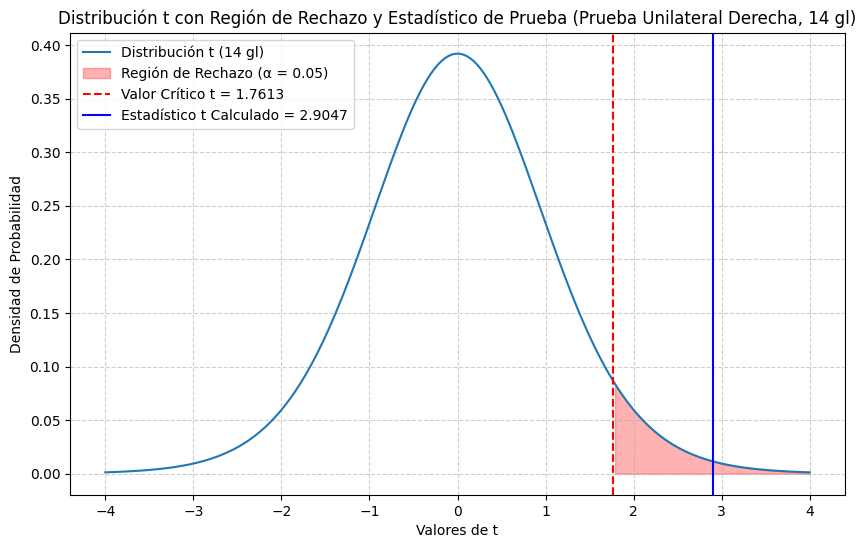


7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico t calculado (2.9047) > valor crítico t (1.7613))
   O: Rechazar H0 (porque el valor p (0.0058) < nivel de significancia α (0.05))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que el tiempo promedio de entrega a domicilio es mayor a 25 minutos. Esto respalda la sospecha del cliente.
   Significado del valor p: Si el tiempo promedio real de entrega fuera de 25 minutos (H0 es verdadera), habría una probabilidad de 0.58% de obtener una media muestral tan alta o más alta como 28 minutos por pura casualidad.


In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 25  # minutos (afirmación del restaurante bajo H0)
media_muestral = 28  # minutos
desviacion_estandar_muestral = 4  # minutos (s)
tamano_muestra = 15
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El tiempo promedio de entrega es igual a 25 minutos (μ = 25).
# H1: El tiempo promedio de entrega es mayor a 25 minutos (μ > 25).
# Esta es una prueba unilateral derecha porque el cliente sospecha que es mayor.
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} minutos")
print(f"   H1: μ > {media_poblacional_hipotetizada} minutos (Prueba unilateral derecha)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico t porque la desviación estándar poblacional (σ) es desconocida
# y el tamaño de la muestra es pequeño (n < 30).
# La distribución del estadístico de prueba bajo H0 es la distribución t de Student con n-1 grados de libertad.
grados_libertad = tamano_muestra - 1
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: t")
print(f"   Distribución bajo H0: Distribución t de Student con {grados_libertad} grados de libertad")
print("   Justificación: Desviación estándar poblacional (σ) desconocida y tamaño de muestra pequeño.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral derecha con α = 0.05 y n-1 grados de libertad, el valor crítico t es el valor
# tal que el 5% del área está en la cola derecha de la distribución t.
valor_critico_t = stats.t.ppf(1 - nivel_significancia, grados_libertad)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico t: {valor_critico_t:.4f}")
print(f"   Región de rechazo: t_calculado > {valor_critico_t:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico t para una media con σ desconocida: t = (x̄ - μ) / (s / √n)
error_estandar_muestral = desviacion_estandar_muestral / np.sqrt(tamano_muestra)
estadistico_t = (media_muestral - media_poblacional_hipotetizada) / error_estandar_muestral
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar muestral: {error_estandar_muestral:.4f}")
print(f"   Estadístico de prueba t calculado: {estadistico_t:.4f}")

# Para una prueba unilateral derecha, el valor p es el área a la derecha del estadístico t calculado.
valor_p = 1 - stats.t.cdf(estadistico_t, grados_libertad)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución t
t_values = np.linspace(-4, 4, 200)
pdf_values = stats.t.pdf(t_values, grados_libertad)

plt.figure(figsize=(10, 6))
plt.plot(t_values, pdf_values, label=f'Distribución t ({grados_libertad} gl)')

# Rellenar la región de rechazo (cola derecha)
# La región de rechazo es para t > valor_critico_t
t_rechazo = t_values[t_values > valor_critico_t]
pdf_rechazo = stats.t.pdf(t_rechazo, grados_libertad)
plt.fill_between(t_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_t, color='red', linestyle='--', label=f'Valor Crítico t = {valor_critico_t:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_t, color='blue', linestyle='-', label=f'Estadístico t Calculado = {estadistico_t:.4f}')

# Añadir etiquetas y título
plt.title(f'Distribución t con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Derecha, {grados_libertad} gl)')
plt.xlabel('Valores de t')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_t > valor_critico_t:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) > valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que el tiempo promedio de entrega a domicilio es mayor a 25 minutos. Esto respalda la sospecha del cliente.")
    print(f"   Significado del valor p: Si el tiempo promedio real de entrega fuera de 25 minutos (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan alta o más alta como 28 minutos por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico t calculado ({estadistico_t:.4f}) <= valor crítico t ({valor_critico_t:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que el tiempo promedio de entrega a domicilio es mayor a 25 minutos. No podemos rechazar la afirmación del restaurante de que el tiempo promedio es de 25 minutos.")
    print(f"   Significado del valor p: Si el tiempo promedio real de entrega fuera de 25 minutos (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan alta o más alta como 28 minutos por pura casualidad.")

1. Hipótesis:
   H0: μ = 500 mL
   H1: μ < 500 mL (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.01

3. Estadístico de prueba y distribución:
   Estadístico de prueba: Z
   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)
   Justificación: Desviación estándar poblacional (σ) conocida.

4. Valor crítico y región de rechazo:
   Valor crítico Z: -2.3263
   Región de rechazo: Z_calculado < -2.3263

5. Cálculo del estadístico de prueba y valor p:
   Error estándar: 0.6455
   Estadístico de prueba Z calculado: -3.0984
   Valor p: 0.0010

6. Gráfico:


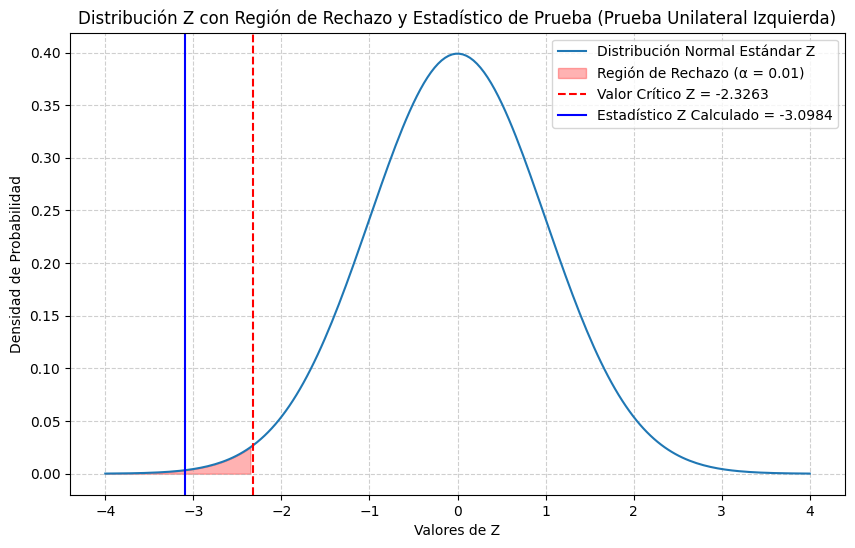


7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado (-3.0984) < valor crítico Z (-2.3263))
   O: Rechazar H0 (porque el valor p (0.0010) < nivel de significancia α (0.01))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 1%) para concluir que el volumen promedio de llenado de las botellas es menor a 500 mL. Esto respalda la sospecha de subllenado.
   Significado del valor p: Si el volumen promedio real de llenado fuera de 500 mL (H0 es verdadera), habría una probabilidad de 0.0973% de obtener una media muestral tan baja o más baja como 498 mL por pura casualidad.


In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 500  # mL (afirmación de la máquina bajo H0)
media_muestral = 498  # mL
desviacion_estandar_poblacional = 5  # mL
tamano_muestra = 60
nivel_significancia = 0.01  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El volumen promedio de llenado es igual a 500 mL (μ = 500).
# H1: El volumen promedio de llenado es menor a 500 mL (μ < 500).
# Esta es una prueba unilateral izquierda porque la auditoría revela una media menor, sugiriendo subllenado.
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} mL")
print(f"   H1: μ < {media_poblacional_hipotetizada} mL (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico Z porque la desviación estándar poblacional (σ) es conocida
# y el tamaño de la muestra es grande (n >= 30, aunque con sigma conocida se usa Z
# independientemente del tamaño de muestra).
# La distribución del estadístico de prueba bajo H0 es la distribución normal estándar Z(0, 1).
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: Z")
print("   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)")
print("   Justificación: Desviación estándar poblacional (σ) conocida.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.01, el valor crítico Z es el valor
# tal que el 1% del área está en la cola izquierda de la distribución Z.
valor_critico_z = stats.norm.ppf(nivel_significancia)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico Z: {valor_critico_z:.4f}")
print(f"   Región de rechazo: Z_calculado < {valor_critico_z:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico Z para una media con σ conocida: Z = (x̄ - μ) / (σ / √n)
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)
estadistico_z = (media_muestral - media_poblacional_hipotetizada) / error_estandar
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar: {error_estandar:.4f}")
print(f"   Estadístico de prueba Z calculado: {estadistico_z:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico Z calculado.
valor_p = stats.norm.cdf(estadistico_z)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución Z
z_values = np.linspace(-4, 4, 200)
pdf_values = stats.norm.pdf(z_values, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(z_values, pdf_values, label='Distribución Normal Estándar Z')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para Z < valor_critico_z
z_rechazo = z_values[z_values < valor_critico_z]
pdf_rechazo = stats.norm.pdf(z_rechazo, 0, 1)
plt.fill_between(z_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_z, color='red', linestyle='--', label=f'Valor Crítico Z = {valor_critico_z:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_z, color='blue', linestyle='-', label=f'Estadístico Z Calculado = {estadistico_z:.4f}')

# Añadir etiquetas y título
plt.title('Distribución Z con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda)')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_z < valor_critico_z:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) < valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 1%) para concluir que el volumen promedio de llenado de las botellas es menor a 500 mL. Esto respalda la sospecha de subllenado.")
    print(f"   Significado del valor p: Si el volumen promedio real de llenado fuera de 500 mL (H0 es verdadera), habría una probabilidad de {valor_p*100:.4f}% de obtener una media muestral tan baja o más baja como 498 mL por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) >= valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que el volumen promedio de llenado de las botellas es menor a 500 mL. No podemos rechazar la afirmación de la máquina de que el volumen promedio es de 500 mL.")
    print(f"   Significado del valor p: Si el volumen promedio real de llenado fuera de 500 mL (H0 es verdadera), habría una probabilidad de {valor_p*100:.4f}% de obtener una media muestral tan baja o más baja como 498 mL por pura casualidad.")

1. Hipótesis:
   H0: μ = 10 mmHg
   H1: μ < 10 mmHg (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: Z
   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)
   Justificación: Desviación estándar poblacional (σ) conocida.

4. Valor crítico y región de rechazo:
   Valor crítico Z: -1.6449
   Región de rechazo: Z_calculado < -1.6449

5. Cálculo del estadístico de prueba y valor p:
   Error estándar: 0.6000
   Estadístico de prueba Z calculado: -3.3333
   Valor p: 0.0004

6. Gráfico:


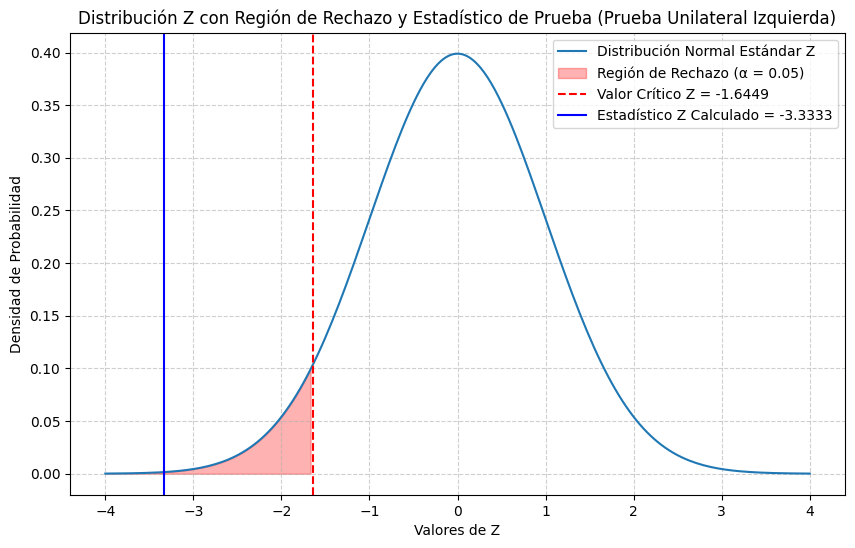


7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado (-3.3333) < valor crítico Z (-1.6449))
   O: Rechazar H0 (porque el valor p (0.0004) < nivel de significancia α (0.05))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que la reducción promedio de la presión arterial es menor a 10 mmHg. Esto contradice la afirmación del laboratorio.
   Significado del valor p: Si la reducción promedio real fuera de 10 mmHg (H0 es verdadera), habría una probabilidad de 0.04% de obtener una reducción promedio muestral tan baja o más baja como 8 mmHg por pura casualidad.


In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
reduccion_promedio_hipotetizada = 10  # mmHg (afirmación del laboratorio bajo H0)
reduccion_promedio_muestral = 8  # mmHg
desviacion_estandar_poblacional = 3  # mmHg
tamano_muestra = 25
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: La reducción promedio de la presión arterial es igual a 10 mmHg (μ = 10).
# H1: La reducción promedio de la presión arterial es menor a 10 mmHg (μ < 10).
# Esta es una prueba unilateral izquierda porque el estudio muestra una reducción menor.
print("1. Hipótesis:")
print(f"   H0: μ = {reduccion_promedio_hipotetizada} mmHg")
print(f"   H1: μ < {reduccion_promedio_hipotetizada} mmHg (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico Z porque la desviación estándar poblacional (σ) es conocida,
# a pesar de que el tamaño de la muestra es pequeño (n < 30).
# La distribución del estadístico de prueba bajo H0 es la distribución normal estándar Z(0, 1).
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: Z")
print("   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)")
print("   Justificación: Desviación estándar poblacional (σ) conocida.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.05, el valor crítico Z es el valor
# tal que el 5% del área está en la cola izquierda de la distribución Z.
valor_critico_z = stats.norm.ppf(nivel_significancia)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico Z: {valor_critico_z:.4f}")
print(f"   Región de rechazo: Z_calculado < {valor_critico_z:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico Z para una media con σ conocida: Z = (x̄ - μ) / (σ / √n)
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)
estadistico_z = (reduccion_promedio_muestral - reduccion_promedio_hipotetizada) / error_estandar
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar: {error_estandar:.4f}")
print(f"   Estadístico de prueba Z calculado: {estadistico_z:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico Z calculado.
valor_p = stats.norm.cdf(estadistico_z)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución Z
z_values = np.linspace(-4, 4, 200)
pdf_values = stats.norm.pdf(z_values, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(z_values, pdf_values, label='Distribución Normal Estándar Z')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para Z < valor_critico_z
z_rechazo = z_values[z_values < valor_critico_z]
pdf_rechazo = stats.norm.pdf(z_rechazo, 0, 1)
plt.fill_between(z_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_z, color='red', linestyle='--', label=f'Valor Crítico Z = {valor_critico_z:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_z, color='blue', linestyle='-', label=f'Estadístico Z Calculado = {estadistico_z:.4f}')

# Añadir etiquetas y título
plt.title('Distribución Z con Región de Rechazo y Estadístico de Prueba (Prueba Unilateral Izquierda)')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_z < valor_critico_z:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) < valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que la reducción promedio de la presión arterial es menor a 10 mmHg. Esto contradice la afirmación del laboratorio.")
    print(f"   Significado del valor p: Si la reducción promedio real fuera de 10 mmHg (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una reducción promedio muestral tan baja o más baja como 8 mmHg por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) >= valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que la reducción promedio de la presión arterial es menor a 10 mmHg. No podemos rechazar la afirmación del laboratorio de que la reducción promedio es de 10 mmHg.")
    print(f"   Significado del valor p: Si la reducción promedio real fuera de 10 mmHg (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una reducción promedio muestral tan baja o más baja como 8 mmHg por pura casualidad.")

1. Hipótesis:
   H0: μ = 75 puntos
   H1: μ ≠ 75 puntos (Prueba bilateral)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: Z
   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)
   Justificación: Desviación estándar poblacional (σ) conocida.

4. Valores críticos y región de rechazo:
   Valores críticos Z: -1.9600 y 1.9600
   Región de rechazo: Z_calculado < -1.9600 o Z_calculado > 1.9600

5. Cálculo del estadístico de prueba y valor p:
   Error estándar: 2.0000
   Estadístico de prueba Z calculado: 1.5000
   Valor p: 0.1336

6. Gráfico:


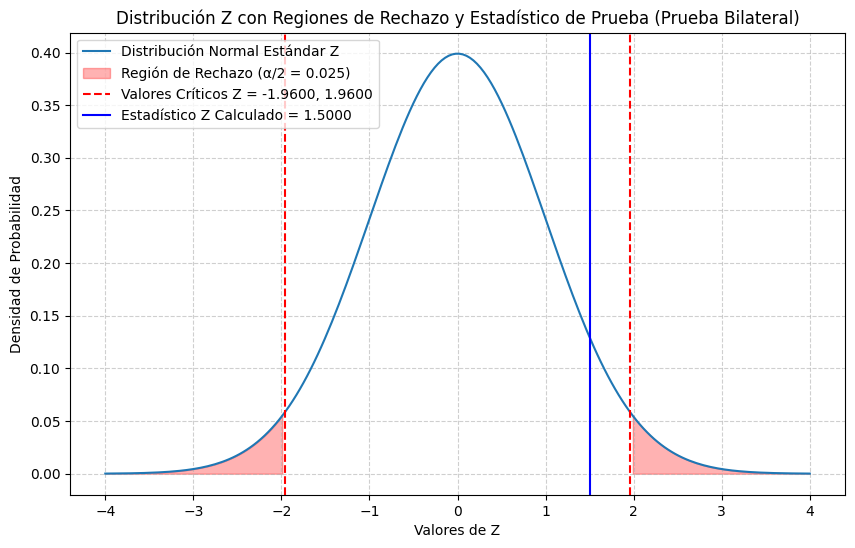


7. Decisión y Conclusión:
   Decisión estadística: No rechazar H0 (porque el valor absoluto del estadístico Z calculado (1.5000) <= valor crítico Z superior (1.9600))
   O: No rechazar H0 (porque el valor p (0.1336) >= nivel de significancia α (0.05))
   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que el promedio de la clase en el examen nacional es diferente al promedio nacional de 75 puntos. No podemos rechazar la afirmación de que el promedio de la clase es igual al promedio nacional.
   Significado del valor p: Si el promedio real de la clase fuera de 75 puntos (H0 es verdadera), habría una probabilidad de 13.36% de obtener una media muestral tan extrema o más extrema (tan baja como 72.00 o tan alta como 78.00) por pura casualidad.


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 75  # puntos (afirmación nacional bajo H0)
media_muestral = 78  # puntos
desviacion_estandar_poblacional = 12  # puntos
tamano_muestra = 36
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El promedio de la clase es igual al promedio nacional (μ = 75).
# H1: El promedio de la clase es diferente al promedio nacional (μ ≠ 75).
# Esta es una prueba bilateral porque se investiga si es "diferente".
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} puntos")
print(f"   H1: μ ≠ {media_poblacional_hipotetizada} puntos (Prueba bilateral)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico Z porque la desviación estándar poblacional (σ) es conocida
# y el tamaño de la muestra es grande (n >= 30, aunque con sigma conocida se usa Z).
# La distribución del estadístico de prueba bajo H0 es la distribución normal estándar Z(0, 1).
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: Z")
print("   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)")
print("   Justificación: Desviación estándar poblacional (σ) conocida.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba bilateral con α = 0.05, el área en cada cola es α/2 = 0.025.
# Hay dos valores críticos Z, uno positivo y uno negativo.
valor_critico_z_inferior = stats.norm.ppf(nivel_significancia / 2)
valor_critico_z_superior = stats.norm.ppf(1 - nivel_significancia / 2)
print("\n4. Valores críticos y región de rechazo:")
print(f"   Valores críticos Z: {valor_critico_z_inferior:.4f} y {valor_critico_z_superior:.4f}")
print(f"   Región de rechazo: Z_calculado < {valor_critico_z_inferior:.4f} o Z_calculado > {valor_critico_z_superior:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico Z para una media con σ conocida: Z = (x̄ - μ) / (σ / √n)
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)
estadistico_z = (media_muestral - media_poblacional_hipotetizada) / error_estandar
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar: {error_estandar:.4f}")
print(f"   Estadístico de prueba Z calculado: {estadistico_z:.4f}")

# Para una prueba bilateral, el valor p es el doble del área en la cola más allá del estadístico Z calculado.
# Como nuestro estadístico Z es positivo, calculamos el área a la derecha (1 - cdf) y la multiplicamos por 2.
# Si fuera negativo, calcularíamos el área a la izquierda (cdf) y la multiplicaríamos por 2.
# Una forma más general es usar 2 * (1 - cdf(|Z|)) o 2 * cdf(-|Z|).
valor_p = 2 * (1 - stats.norm.cdf(abs(estadistico_z)))
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, los valores críticos y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución Z
z_values = np.linspace(-4, 4, 200)
pdf_values = stats.norm.pdf(z_values, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(z_values, pdf_values, label='Distribución Normal Estándar Z')

# Rellenar la región de rechazo (colas)
# La región de rechazo es para Z < valor_critico_z_inferior o Z > valor_critico_z_superior
z_rechazo_inferior = z_values[z_values < valor_critico_z_inferior]
pdf_rechazo_inferior = stats.norm.pdf(z_rechazo_inferior, 0, 1)
plt.fill_between(z_rechazo_inferior, pdf_rechazo_inferior, color='red', alpha=0.3, label=f'Región de Rechazo (α/2 = {nivel_significancia/2})')

z_rechazo_superior = z_values[z_values > valor_critico_z_superior]
pdf_rechazo_superior = stats.norm.pdf(z_rechazo_superior, 0, 1)
plt.fill_between(z_rechazo_superior, pdf_rechazo_superior, color='red', alpha=0.3) # No label here to avoid duplicate legend entry

# Marcar los valores críticos
plt.axvline(valor_critico_z_inferior, color='red', linestyle='--', label=f'Valores Críticos Z = {valor_critico_z_inferior:.4f}, {valor_critico_z_superior:.4f}')
plt.axvline(valor_critico_z_superior, color='red', linestyle='--') # No label here

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_z, color='blue', linestyle='-', label=f'Estadístico Z Calculado = {estadistico_z:.4f}')

# Añadir etiquetas y título
plt.title('Distribución Z con Regiones de Rechazo y Estadístico de Prueba (Prueba Bilateral)')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if abs(estadistico_z) > abs(valor_critico_z_superior): # O estadistico_z < valor_critico_z_inferior or estadistico_z > valor_critico_z_superior
    print(f"   Decisión estadística: Rechazar H0 (porque el valor absoluto del estadístico Z calculado ({abs(estadistico_z):.4f}) > valor crítico Z superior ({abs(valor_critico_z_superior):.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print(f"   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del {nivel_significancia*100:.0f}%) para concluir que el promedio de la clase en el examen nacional es diferente al promedio nacional de {media_poblacional_hipotetizada} puntos. Esto respalda la afirmación del profesor.")
    print(f"   Significado del valor p: Si el promedio real de la clase fuera de {media_poblacional_hipotetizada} puntos (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan extrema o más extrema (tan baja como {media_poblacional_hipotetizada - (media_muestral - media_poblacional_hipotetizada):.2f} o tan alta como {media_muestral:.2f}) por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el valor absoluto del estadístico Z calculado ({abs(estadistico_z):.4f}) <= valor crítico Z superior ({abs(valor_critico_z_superior):.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print(f"   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del {nivel_significancia*100:.0f}%) para concluir que el promedio de la clase en el examen nacional es diferente al promedio nacional de {media_poblacional_hipotetizada} puntos. No podemos rechazar la afirmación de que el promedio de la clase es igual al promedio nacional.")
    print(f"   Significado del valor p: Si el promedio real de la clase fuera de {media_poblacional_hipotetizada} puntos (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan extrema o más extrema (tan baja como {media_poblacional_hipotetizada - (media_muestral - media_poblacional_hipotetizada):.2f} o tan alta como {media_muestral:.2f}) por pura casualidad.")

1. Hipótesis:
   H0: μ = 1200 horas
   H1: μ < 1200 horas (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.01

3. Estadístico de prueba y distribución:
   Estadístico de prueba: Z
   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)
   Justificación: Desviación estándar poblacional (σ) conocida.

4. Valor crítico y región de rechazo:
   Valor crítico Z: -2.3263
   Región de rechazo: Z_calculado < -2.3263

5. Cálculo del estadístico de prueba y valor p:
   Error estándar: 14.1421
   Estadístico de prueba Z calculado: -1.4142
   Valor p: 0.0786

6. Gráfico:


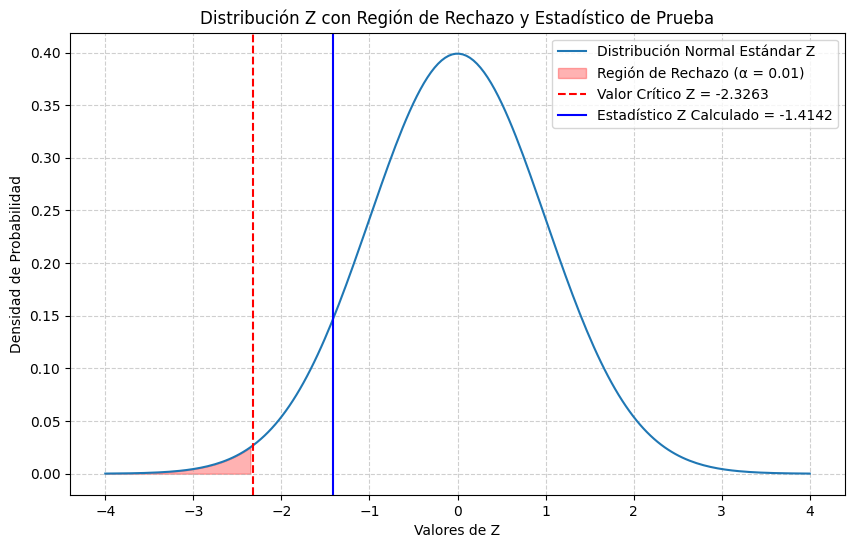


7. Decisión y Conclusión:
   Decisión estadística: No rechazar H0 (porque el estadístico Z calculado (-1.4142) >= valor crítico Z (-2.3263))
   O: No rechazar H0 (porque el valor p (0.0786) >= nivel de significancia α (0.01))
   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que la duración promedio de las baterías es menor a 1200 horas. No podemos rechazar la afirmación del fabricante de que la duración promedio es de 1200 horas.
   Significado del valor p: Si la duración promedio real de las baterías fuera de 1200 horas (H0 es verdadera), habría una probabilidad de 7.86% de obtener una media muestral tan baja o más baja como 1180 horas por pura casualidad.


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 1200  # horas (afirmación del fabricante bajo H0)
media_muestral = 1180  # horas
desviacion_estandar_poblacional = 100  # horas
tamano_muestra = 50
nivel_significancia = 0.01  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: La duración promedio de las baterías es igual a 1200 horas (μ = 1200).
# H1: La duración promedio de las baterías es menor a 1200 horas (μ < 1200).
# Esta es una prueba unilateral izquierda porque la alegación del cliente es de menor duración.
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} horas")
print(f"   H1: μ < {media_poblacional_hipotetizada} horas (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico Z porque la desviación estándar poblacional (σ) es conocida
# y el tamaño de la muestra es grande (n >= 30, aunque con sigma conocida se usa Z).
# La distribución del estadístico de prueba bajo H0 es la distribución normal estándar Z(0, 1).
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: Z")
print("   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)")
print("   Justificación: Desviación estándar poblacional (σ) conocida.")

# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.01, el valor crítico Z es el valor
# tal que el 1% del área está en la cola izquierda de la distribución Z.
valor_critico_z = stats.norm.ppf(nivel_significancia)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico Z: {valor_critico_z:.4f}")
print(f"   Región de rechazo: Z_calculado < {valor_critico_z:.4f}")

# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico Z para una media con σ conocida: Z = (x̄ - μ) / (σ / √n)
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)
estadistico_z = (media_muestral - media_poblacional_hipotetizada) / error_estandar
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar: {error_estandar:.4f}")
print(f"   Estadístico de prueba Z calculado: {estadistico_z:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico Z calculado.
valor_p = stats.norm.cdf(estadistico_z)
print(f"   Valor p: {valor_p:.4f}")

# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.
print("\n6. Gráfico:")
# Generar puntos para la distribución Z
z_values = np.linspace(-4, 4, 200)
pdf_values = stats.norm.pdf(z_values, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(z_values, pdf_values, label='Distribución Normal Estándar Z')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para Z < valor_critico_z
z_rechazo = z_values[z_values < valor_critico_z]
pdf_rechazo = stats.norm.pdf(z_rechazo, 0, 1)
plt.fill_between(z_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_z, color='red', linestyle='--', label=f'Valor Crítico Z = {valor_critico_z:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_z, color='blue', linestyle='-', label=f'Estadístico Z Calculado = {estadistico_z:.4f}')

# Añadir etiquetas y título
plt.title('Distribución Z con Región de Rechazo y Estadístico de Prueba')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_z < valor_critico_z:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) < valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 1%) para concluir que la duración promedio de las baterías es menor a 1200 horas. Esto respalda la alegación del cliente.")
    print(f"   Significado del valor p: Si la duración promedio real de las baterías fuera de 1200 horas (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 1180 horas por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) >= valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 1%) para concluir que la duración promedio de las baterías es menor a 1200 horas. No podemos rechazar la afirmación del fabricante de que la duración promedio es de 1200 horas.")
    print(f"   Significado del valor p: Si la duración promedio real de las baterías fuera de 1200 horas (H0 es verdadera), habría una probabilidad de {valor_p*100:.2f}% de obtener una media muestral tan baja o más baja como 1180 horas por pura casualidad.")

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Datos proporcionados
media_poblacional_hipotetizada = 500  # g (afirmación de la empresa bajo H0)
media_muestral = 495  # g
desviacion_estandar_poblacional = 15  # g
tamano_muestra = 40
nivel_significancia = 0.05  # α

# 1. Defina las hipótesis nula y alternativa.
# H0: El peso promedio de los paquetes de cereal es igual a 500 g (μ = 500).
# H1: El peso promedio de los paquetes de cereal es menor a 500 g (μ < 500).
# Esta es una prueba unilateral izquierda porque la sospecha es de subllenado.
print("1. Hipótesis:")
print(f"   H0: μ = {media_poblacional_hipotetizada} g")
print(f"   H1: μ < {media_poblacional_hipotetizada} g (Prueba unilateral izquierda)")

# 2. Establezca el nivel de significancia α.
print("\n2. Nivel de significancia α:")
print(f"   α = {nivel_significancia}")

# 3. Identifique el estadístico de prueba (Z, t, χ²) y su distribución.
# Se utiliza el estadístico Z porque la desviación estándar poblacional (σ) es conocida
# y el tamaño de la muestra es grande (n >= 30, aunque con sigma conocida se usa Z
# independientemente del tamaño de muestra).
# La distribución del estadístico de prueba bajo H0 es la distribución normal estándar Z(0, 1).
print("\n3. Estadístico de prueba y distribución:")
print("   Estadístico de prueba: Z")
print("   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)")
print("   Justificación: Desviación estándar poblacional (σ) conocida.")


# 4. Determine el valor crítico y la región de rechazo.
# Para una prueba unilateral izquierda con α = 0.05, el valor crítico Z es el valor
# tal que el 5% del área está en la cola izquierda de la distribución Z.
valor_critico_z = stats.norm.ppf(nivel_significancia)
print("\n4. Valor crítico y región de rechazo:")
print(f"   Valor crítico Z: {valor_critico_z:.4f}")
print(f"   Región de rechazo: Z_calculado < {valor_critico_z:.4f}")


# 5. Calcule el estadístico de prueba y el valor p.
# Fórmula del estadístico Z para una media con σ conocida: Z = (x̄ - μ) / (σ / √n)
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)
estadistico_z = (media_muestral - media_poblacional_hipotetizada) / error_estandar
print("\n5. Cálculo del estadístico de prueba y valor p:")
print(f"   Error estándar: {error_estandar:.4f}")
print(f"   Estadístico de prueba Z calculado: {estadistico_z:.4f}")

# Para una prueba unilateral izquierda, el valor p es el área a la izquierda del estadístico Z calculado.
valor_p = stats.norm.cdf(estadistico_z)
print(f"   Valor p: {valor_p:.4f}")


# 7. Tome una decisión estadística y concluya en términos prácticos, explicando el significado del valor p.
print("\n7. Decisión y Conclusión:")
if estadistico_z < valor_critico_z:
    print(f"   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) < valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: Rechazar H0 (porque el valor p ({valor_p:.4f}) < nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que el peso promedio de los paquetes de cereal es menor a 500 g. Esto respalda la sospecha de que la máquina está subllenando.")
    print(f"   Significado del valor p: Si la máquina realmente estuviera llenando los paquetes con un promedio de 500 g (H0 es verdadera), habría una probabilidad de {valor_p:.2f}% de obtener una media muestral tan baja o más baja como 495 g por pura casualidad.")
else:
    print(f"   Decisión estadística: No rechazar H0 (porque el estadístico Z calculado ({estadistico_z:.4f}) >= valor crítico Z ({valor_critico_z:.4f}))")
    print(f"   O: No rechazar H0 (porque el valor p ({valor_p:.4f}) >= nivel de significancia α ({nivel_significancia}))")
    print("   Conclusión: No existe evidencia estadística suficiente (al nivel de significancia del 5%) para concluir que el peso promedio de los paquetes de cereal es menor a 500 g. No podemos rechazar la afirmación de la empresa de que el peso promedio es de 500 g.")
    print(f"   Significado del valor p: Si la máquina realmente estuviera llenando los paquetes con un promedio de 500 g (H0 es verdadera), habría una probabilidad de {valor_p:.2f}% de obtener una media muestral tan baja o más baja como 495 g por pura casualidad.")

1. Hipótesis:
   H0: μ = 500 g
   H1: μ < 500 g (Prueba unilateral izquierda)

2. Nivel de significancia α:
   α = 0.05

3. Estadístico de prueba y distribución:
   Estadístico de prueba: Z
   Distribución bajo H0: Distribución Normal Estándar Z(0, 1)
   Justificación: Desviación estándar poblacional (σ) conocida.

4. Valor crítico y región de rechazo:
   Valor crítico Z: -1.6449
   Región de rechazo: Z_calculado < -1.6449

5. Cálculo del estadístico de prueba y valor p:
   Error estándar: 2.3717
   Estadístico de prueba Z calculado: -2.1082
   Valor p: 0.0175

7. Decisión y Conclusión:
   Decisión estadística: Rechazar H0 (porque el estadístico Z calculado (-2.1082) < valor crítico Z (-1.6449))
   O: Rechazar H0 (porque el valor p (0.0175) < nivel de significancia α (0.05))
   Conclusión: Existe evidencia estadística significativa (al nivel de significancia del 5%) para concluir que el peso promedio de los paquetes de cereal es menor a 500 g. Esto respalda la sospecha de que la máquin

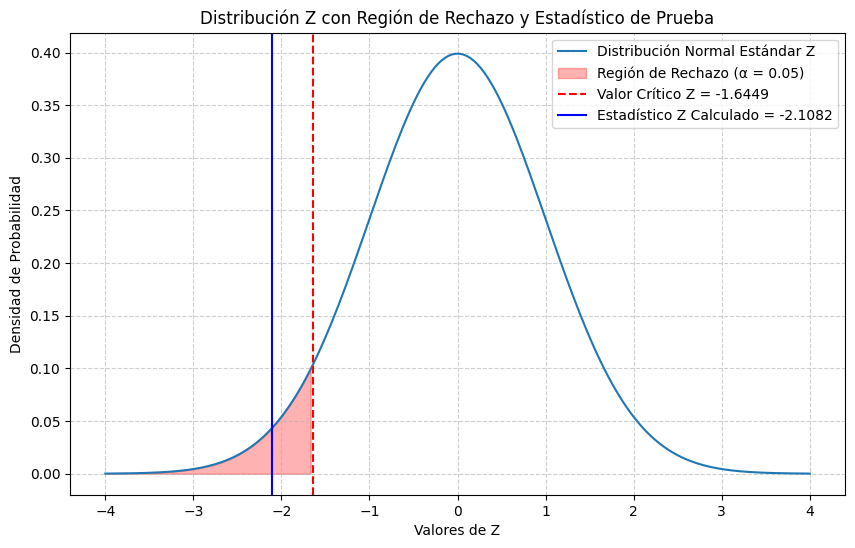

In [ ]:
# 6. Grafique la distribución correspondiente, indicando claramente la región de rechazo, el valor crítico y el estadístico calculado.

# Generar puntos para la distribución Z
z_values = np.linspace(-4, 4, 200)
pdf_values = stats.norm.pdf(z_values, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(z_values, pdf_values, label='Distribución Normal Estándar Z')

# Rellenar la región de rechazo (cola izquierda)
# La región de rechazo es para Z < valor_critico_z
z_rechazo = z_values[z_values < valor_critico_z]
pdf_rechazo = stats.norm.pdf(z_rechazo, 0, 1)
plt.fill_between(z_rechazo, pdf_rechazo, color='red', alpha=0.3, label=f'Región de Rechazo (α = {nivel_significancia})')

# Marcar el valor crítico
plt.axvline(valor_critico_z, color='red', linestyle='--', label=f'Valor Crítico Z = {valor_critico_z:.4f}')

# Marcar el estadístico de prueba calculado
plt.axvline(estadistico_z, color='blue', linestyle='-', label=f'Estadístico Z Calculado = {estadistico_z:.4f}')

# Añadir etiquetas y título
plt.title('Distribución Z con Región de Rechazo y Estadístico de Prueba')
plt.xlabel('Valores de Z')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 12  # puntos
margen_error = 3  # puntos
nivel_confianza = 0.90

# Calcular el valor Z para el nivel de confianza del 90%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario
# Fórmula: n = (Z^2 * sigma^2) / E^2
tamano_muestra = (valor_z**2 * desviacion_estandar_poblacional**2) / (margen_error**2)
tamano_muestra = np.ceil(tamano_muestra) # Redondear al siguiente entero superior

# Mostrar el resultado
print(f"Tamaño de muestra necesario para estimar el puntaje promedio: {int(tamano_muestra)}")

Tamaño de muestra necesario para estimar el puntaje promedio: 44


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 5  # minutos
margen_error = 1.5  # minutos
nivel_confianza = 0.95

# Calcular el valor Z para el nivel de confianza del 95%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario
# Fórmula: n = (Z^2 * sigma^2) / E^2
tamano_muestra = (valor_z**2 * desviacion_estandar_poblacional**2) / (margen_error**2)
tamano_muestra = np.ceil(tamano_muestra) # Redondear al siguiente entero superior

# Mostrar el resultado
print(f"Tamaño de muestra necesario para estimar la duración media de las reuniones: {int(tamano_muestra)}")

Tamaño de muestra necesario para estimar la duración media de las reuniones: 43


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 1.2  # kg
margen_error = 0.5  # kg
nivel_confianza = 0.99

# Calcular el valor Z para el nivel de confianza del 99%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario
# Fórmula: n = (Z^2 * sigma^2) / E^2
tamano_muestra = (valor_z**2 * desviacion_estandar_poblacional**2) / (margen_error**2)
tamano_muestra = np.ceil(tamano_muestra) # Redondear al siguiente entero superior

# Mostrar el resultado
print(f"Tamaño de muestra necesario para estimar el peso promedio de los paquetes: {int(tamano_muestra)}")

Tamaño de muestra necesario para estimar el peso promedio de los paquetes: 39


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 50  # kWh
margen_error = 10  # kWh
nivel_confianza = 0.90

# Calcular el valor Z para el nivel de confianza del 90%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario
# Fórmula: n = (Z^2 * sigma^2) / E^2
tamano_muestra = (valor_z**2 * desviacion_estandar_poblacional**2) / (margen_error**2)
tamano_muestra = np.ceil(tamano_muestra) # Redondear al siguiente entero superior

# Mostrar el resultado
print(f"Tamaño de muestra necesario para estimar el consumo mensual promedio: {int(tamano_muestra)}")

Tamaño de muestra necesario para estimar el consumo mensual promedio: 68


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 8  # minutos
margen_error = 2  # minutos
nivel_confianza = 0.95

# Calcular el valor Z para el nivel de confianza del 95%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario
# Fórmula: n = (Z^2 * sigma^2) / E^2
tamano_muestra = (valor_z**2 * desviacion_estandar_poblacional**2) / (margen_error**2)
tamano_muestra = np.ceil(tamano_muestra) # Redondear al siguiente entero superior

# Mostrar el resultado
print(f"Tamaño de muestra necesario para estimar el tiempo medio de espera: {int(tamano_muestra)}")

Tamaño de muestra necesario para estimar el tiempo medio de espera: 62


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
proporcion_previa = 0.69  # 69% de mejoría en prueba preliminar
margen_error = 0.04   # 4%
nivel_confianza = 0.95

# Calcular el valor Z para el nivel de confianza del 95%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario con la prueba preliminar
# Fórmula: n = (Z^2 * p * (1-p)) / E^2
tamano_muestra_previa = (valor_z**2 * proporcion_previa * (1 - proporcion_previa)) / (margen_error**2)
tamano_muestra_previa = np.ceil(tamano_muestra_previa) # Redondear al siguiente entero superior

# Calcular el tamaño de muestra necesario sin datos preliminares (usando p=0.5 para el caso más conservador)
# Fórmula: n = (Z^2 * 0.25) / E^2
tamano_muestra_sin_previa = (valor_z**2 * 0.25) / (margen_error**2)
tamano_muestra_sin_previa = np.ceil(tamano_muestra_sin_previa) # Redondear al siguiente entero superior

# Mostrar los resultados
print(f"Tamaño de muestra necesario con prueba preliminar ({proporcion_previa*100}%): {int(tamano_muestra_previa)}")
print(f"Tamaño de muestra necesario conservador (p=50%): {int(tamano_muestra_sin_previa)}")

Tamaño de muestra necesario con prueba preliminar (69.0%): 514
Tamaño de muestra necesario conservador (p=50%): 601


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
proporcion_previa = 0.56  # 56% de apoyo previo
margen_error = 0.05   # 5%
nivel_confianza = 0.95

# Calcular el valor Z para el nivel de confianza del 95%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario con la encuesta previa
# Fórmula: n = (Z^2 * p * (1-p)) / E^2
tamano_muestra_previa = (valor_z**2 * proporcion_previa * (1 - proporcion_previa)) / (margen_error**2)
tamano_muestra_previa = np.ceil(tamano_muestra_previa) # Redondear al siguiente entero superior

# Calcular el tamaño de muestra necesario sin datos preliminares (usando p=0.5 para el caso más conservador)
# Fórmula: n = (Z^2 * 0.25) / E^2  (ya que p*(1-p) es máximo cuando p=0.5, dando 0.25)
tamano_muestra_sin_previa = (valor_z**2 * 0.25) / (margen_error**2)
tamano_muestra_sin_previa = np.ceil(tamano_muestra_sin_previa) # Redondear al siguiente entero superior

# Mostrar los resultados
print(f"Tamaño de muestra necesario con encuesta informal ({proporcion_previa*100}%): {int(tamano_muestra_previa)}")
print(f"Tamaño de muestra necesario sin datos preliminares (p=50%): {int(tamano_muestra_sin_previa)}")

Tamaño de muestra necesario con encuesta informal (56.00000000000001%): 379
Tamaño de muestra necesario sin datos preliminares (p=50%): 385


**Justificación del uso de p=0.5 si no hay datos preliminares:**

La fórmula para calcular el tamaño de muestra para una proporción es:
$ n = \frac{Z^2 \cdot p \cdot (1-p)}{E^2} $

Donde:
*   $Z$ es el valor Z para el nivel de confianza deseado.
*   $p$ es la proporción poblacional estimada.
*   $E$ es el margen de error deseado.

El producto $p \cdot (1-p)$ alcanza su valor máximo cuando $p = 0.5$. En ese caso, $p \cdot (1-p) = 0.5 \cdot (1-0.5) = 0.5 \cdot 0.5 = 0.25$.

Cuando no se tiene ninguna estimación previa de la proporción ($p$), se utiliza $p = 0.5$ para calcular el tamaño de muestra. Esto se debe a que usar $p = 0.5$ maximiza el valor de $p \cdot (1-p)$, lo que a su vez resulta en el mayor tamaño de muestra posible para un nivel de confianza y margen de error dados.

Este enfoque es el más conservador porque garantiza que el tamaño de muestra calculado será suficiente para lograr el margen de error deseado, independientemente de cuál sea la verdadera proporción poblacional (dentro del rango de 0 a 1). Si se utilizara un valor de $p$ diferente sin justificación, el tamaño de muestra calculado podría ser insuficiente si la verdadera proporción estuviera más cerca de 0.5.

In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
proporcion_previa = 0.42 # 42% de apoyo previo
margen_error = 0.02  # 2%
nivel_confianza = 0.99

# Calcular el valor Z para el nivel de confianza del 99%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario con la encuesta previa
# Fórmula: n = (Z^2 * p * (1-p)) / E^2
tamano_muestra_previa = (valor_z**2 * proporcion_previa * (1 - proporcion_previa)) / (margen_error**2)
tamano_muestra_previa = np.ceil(tamano_muestra_previa) # Redondear al siguiente entero superior

# Calcular el tamaño de muestra necesario sin la encuesta previa (usando p=0.5 para el caso más conservador)
# Fórmula: n = (Z^2 * 0.25) / E^2
tamano_muestra_sin_previa = (valor_z**2 * 0.25) / (margen_error**2)
tamano_muestra_sin_previa = np.ceil(tamano_muestra_sin_previa) # Redondear al siguiente entero superior

# Mostrar los resultados
print(f"Tamaño de muestra necesario con encuesta previa ({proporcion_previa*100}%): {int(tamano_muestra_previa)}")
print(f"Tamaño de muestra necesario sin encuesta previa (p=50%): {int(tamano_muestra_sin_previa)}")

Tamaño de muestra necesario con encuesta previa (42.0%): 4041
Tamaño de muestra necesario sin encuesta previa (p=50%): 4147


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
proporcion_historica = 0.07  # 7%
margen_error = 0.04  # 4%
nivel_confianza = 0.90

# Calcular el valor Z para el nivel de confianza del 90%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario
# Fórmula: n = (Z^2 * p * (1-p)) / E^2
tamano_muestra = (valor_z**2 * proporcion_historica * (1 - proporcion_historica)) / (margen_error**2)
tamano_muestra = np.ceil(tamano_muestra) # Redondear al siguiente entero superior

# Mostrar el resultado
print(f"Tamaño de muestra necesario para estimar la proporción de devoluciones: {int(tamano_muestra)}")

Tamaño de muestra necesario para estimar la proporción de devoluciones: 111


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados para el estudio piloto
proporcion_muestral = 0.72
margen_error = 0.03
nivel_confianza = 0.95

# Calcular el valor Z para el nivel de confianza del 95%
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el tamaño de muestra necesario con el estudio piloto
# Fórmula: n = (Z^2 * p * (1-p)) / E^2
tamano_muestra_piloto = (valor_z**2 * proporcion_muestral * (1 - proporcion_muestral)) / (margen_error**2)
tamano_muestra_piloto = np.ceil(tamano_muestra_piloto) # Redondear al siguiente entero superior

# Calcular el tamaño de muestra necesario sin el estudio piloto (usando p=0.5 para el caso más conservador)
# Fórmula: n = (Z^2 * 0.25) / E^2
tamano_muestra_sin_piloto = (valor_z**2 * 0.25) / (margen_error**2)
tamano_muestra_sin_piloto = np.ceil(tamano_muestra_sin_piloto) # Redondear al siguiente entero superior

# Mostrar los resultados
print(f"Tamaño de muestra necesario con estudio piloto ({proporcion_muestral*100}%): {int(tamano_muestra_piloto)}")
print(f"Tamaño de muestra necesario sin estudio piloto (p=50%): {int(tamano_muestra_sin_piloto)}")

Tamaño de muestra necesario con estudio piloto (72.0%): 861
Tamaño de muestra necesario sin estudio piloto (p=50%): 1068


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
media_muestral = 30  # minutos
desviacion_estandar_muestral = 4  # minutos
tamano_muestra = 20
nivel_confianza = 0.95

# Calcular el error estándar (usando la desviación estándar muestral)
error_estandar = desviacion_estandar_muestral / np.sqrt(tamano_muestra)

# Calcular los grados de libertad
grados_libertad = tamano_muestra - 1

# Calcular el valor t para el nivel de confianza del 95%
# Para un intervalo de confianza del 95%, el área en cada cola es (1 - 0.95) / 2 = 0.025
valor_t = stats.t.ppf(1 - (1 - nivel_confianza) / 2, grados_libertad)

# Calcular el margen de error
margen_error = valor_t * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para el tiempo medio de entrega:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] minutos")

Intervalo de confianza del 95.0% para el tiempo medio de entrega:
[28.13, 31.87] minutos


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
media_muestral = 25  # cm
desviacion_estandar_muestral = 3  # cm
tamano_muestra = 10
nivel_confianza = 0.99

# Calcular el error estándar (usando la desviación estándar muestral)
error_estandar = desviacion_estandar_muestral / np.sqrt(tamano_muestra)

# Calcular los grados de libertad
grados_libertad = tamano_muestra - 1

# Calcular el valor t para el nivel de confianza del 99%
# Para un intervalo de confianza del 99%, el área en cada cola es (1 - 0.99) / 2 = 0.005
valor_t = stats.t.ppf(1 - (1 - nivel_confianza) / 2, grados_libertad)

# Calcular el margen de error
margen_error = valor_t * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la altura media poblacional:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] cm")

Intervalo de confianza del 99.0% para la altura media poblacional:
[21.92, 28.08] cm


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
media_muestral = 8  # horas
desviacion_estandar_muestral = 1.2  # horas
tamano_muestra = 15
nivel_confianza = 0.90

# Calcular el error estándar (usando la desviación estándar muestral)
error_estandar = desviacion_estandar_muestral / np.sqrt(tamano_muestra)

# Calcular los grados de libertad
grados_libertad = tamano_muestra - 1

# Calcular el valor t para el nivel de confianza del 90%
# Para un intervalo de confianza del 90%, el área en cada cola es (1 - 0.90) / 2 = 0.05
valor_t = stats.t.ppf(1 - (1 - nivel_confianza) / 2, grados_libertad)

# Calcular el margen de error
margen_error = valor_t * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la duración media real de la batería:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] horas")

Intervalo de confianza del 90.0% para la duración media real de la batería:
[7.45, 8.55] horas


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
media_muestral = 84  # °C
desviacion_estandar_muestral = 5  # °C
tamano_muestra = 12
nivel_confianza = 0.95

# Calcular el error estándar (usando la desviación estándar muestral ya que la poblacional es desconocida)
error_estandar = desviacion_estandar_muestral / np.sqrt(tamano_muestra)

# Calcular los grados de libertad
grados_libertad = tamano_muestra - 1

# Calcular el valor t para el nivel de confianza del 95%
# Para un intervalo de confianza del 95%, el área en cada cola es (1 - 0.95) / 2 = 0.025
# Usamos la función ppf (inverse cumulative distribution function) de la distribución t
valor_t = stats.t.ppf(1 - (1 - nivel_confianza) / 2, grados_libertad)

# Calcular el margen de error
margen_error = valor_t * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la temperatura media poblacional:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] °C")

Intervalo de confianza del 95.0% para la temperatura media poblacional:
[80.82, 87.18] °C


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 4  # cm
tamano_muestra = 40
media_muestral = 20  # cm
nivel_confianza = 0.95

# Calcular el error estándar
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)

# Calcular el valor Z para el nivel de confianza del 95%
# Para un intervalo de confianza del 95%, el área en cada cola es (1 - 0.95) / 2 = 0.025
# Usamos la función ppf (inverse cumulative distribution function) para obtener el valor Z
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el margen de error
margen_error = valor_z * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] cm")

Intervalo de confianza del 95.0% para la media poblacional:
[18.76, 21.24] cm


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 1.5  # horas
tamano_muestra = 25
media_muestral = 12  # horas
nivel_confianza = 0.95

# Calcular el error estándar
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)

# Calcular el valor Z para el nivel de confianza del 95%
# Para un intervalo de confianza del 95%, el área en cada cola es (1 - 0.95) / 2 = 0.025
# Usamos la función ppf (inverse cumulative distribution function) para obtener el valor Z
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el margen de error
margen_error = valor_z * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la duración media poblacional:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] horas")

Intervalo de confianza del 95.0% para la duración media poblacional:
[11.41, 12.59] horas


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 0.2  # cm
tamano_muestra = 30
media_muestral = 2.5  # cm
nivel_confianza = 0.99

# Calcular el error estándar
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)

# Calcular el valor Z para el nivel de confianza del 99%
# Para un intervalo de confianza del 99%, el área en cada cola es (1 - 0.99) / 2 = 0.005
# Usamos la función ppf (inverse cumulative distribution function) para obtener el valor Z
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el margen de error
margen_error = valor_z * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para el diámetro promedio real:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] cm")

Intervalo de confianza del 99.0% para el diámetro promedio real:
[2.41, 2.59] cm


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
desviacion_estandar_poblacional = 15  # puntos
tamano_muestra = 100
media_muestral = 75  # puntos
nivel_confianza = 0.90

# Calcular el error estándar
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)

# Calcular el valor Z para el nivel de confianza del 90%
# Para un intervalo de confianza del 90%, el área en cada cola es (1 - 0.90) / 2 = 0.05
# Usamos la función ppf (inverse cumulative distribution function) para obtener el valor Z
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el margen de error
margen_error = valor_z * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] puntos")

Intervalo de confianza del 90.0% para la media poblacional:
[72.53, 77.47] puntos


In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
media_muestral = 170  # cm
desviacion_estandar_poblacional = 10  # cm
tamano_muestra = 50
nivel_confianza = 0.95

# Calcular el error estándar
error_estandar = desviacion_estandar_poblacional / np.sqrt(tamano_muestra)

# Calcular el valor Z para el nivel de confianza del 95%
# Para un intervalo de confianza del 95%, el área en cada cola es (1 - 0.95) / 2 = 0.025
# Usamos la función ppf (inverse cumulative distribution function) para obtener el valor Z
valor_z = stats.norm.ppf(1 - (1 - nivel_confianza) / 2)

# Calcular el margen de error
margen_error = valor_z * error_estandar

# Calcular el intervalo de confianza
limite_inferior = media_muestral - margen_error
limite_superior = media_muestral + margen_error

# Mostrar el resultado
print(f"Intervalo de confianza del {nivel_confianza*100}% para la media poblacional:")
print(f"[{limite_inferior:.2f}, {limite_superior:.2f}] cm")

Intervalo de confianza del 95.0% para la media poblacional:
[167.23, 172.77] cm
